In [211]:
import pandas as pd
from math import prod
from statistics import mean

In [212]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [213]:
df = pd.read_json('grid_search_v3_4.json')
# df = df[df['final_min_column_consistency'] == 0.91]

In [214]:
list(df.columns)

['min_block_compatibility',
 'block_min_column_consistency',
 'final_min_column_consistency',
 'min_table_consistency',
 'status_success',
 'confusion_(True, False)',
 'confusion_(True, True)',
 'confusion_(False, False)',
 'confusion_(False, True)',
 'lineCount',
 'correctlyParsedClean',
 'jaccardAvg',
 'jaccardStdDev',
 'expected',
 'got',
 'expectedGotRatio',
 'eager',
 'matchTypesGT_partial',
 'matchTypesGT_underSegmented',
 'matchTypesGT_correct',
 'matchTypesGT_overSegmented',
 'matchTypesGT_missed',
 'matchTypeFalsePositive']

In [215]:
selected = 412

In [216]:
df

,min_block_compatibility,block_min_column_consistency,final_min_column_consistency,min_table_consistency,status_success,"confusion_(True, False)","confusion_(True, True)","confusion_(False, False)","confusion_(False, True)",lineCount,correctlyParsedClean,jaccardAvg,jaccardStdDev,expected,got,expectedGotRatio,eager,matchTypesGT_partial,matchTypesGT_underSegmented,matchTypesGT_correct,matchTypesGT_overSegmented,matchTypesGT_missed,matchTypeFalsePositive
0,0.11,0.11,0.11,0.11,160,3026,114777,1207,70,119080,0.912816,0.671782,0.391880,371,630,2.136205,341,112,123,123,12,1.0,341
1,0.11,0.11,0.11,0.31,160,3018,114773,1215,74,119080,0.914206,0.671782,0.391880,371,628,2.123705,341,114,123,123,10,1.0,341
2,0.11,0.11,0.11,0.51,160,2684,114768,1549,79,119080,0.912192,0.692203,0.383273,371,601,2.090546,306,121,110,128,10,2.0,306
3,0.11,0.11,0.11,0.71,160,2123,114405,2110,442,119080,0.924178,0.689772,0.388902,371,702,2.770754,276,125,99,129,13,5.0,276
4,0.11,0.11,0.11,0.91,160,1118,113222,3115,1625,119080,0.925702,0.658265,0.385027,371,682,2.542093,200,143,68,104,29,27.0,200
5,0.11,0.11,0.31,0.11,160,2840,114648,1393,199,119080,0.908918,0.672515,0.392760,371,785,3.033254,371,112,121,124,13,1.0,371
6,0.11,0.11,0.31,0.31,160,2836,114644,1397,203,119080,0.910309,0.672515,0.392760,371,783,3.020754,371,114,121,124,11,1.0,371
7,0.11,0.11,0.31,0.51,160,2526,114514,1707,333,119080,0.914553,0.689808,0.384479,371,741,2.951344,315,119,110,128,12,2.0,315
8,0.11,0.11,0.31,0.71,160,2030,114389,2203,458,119080,0.924178,0.687569,0.390332,371,700,2.763879,275,124,99,129,13,6.0,275
9,0.11,0.11,0.31,0.91,160,1118,113219,3115,1628,119080,0.925711,0.657473,0.385110,371,683,2.545218,200,142,68,104,30,27.0,200


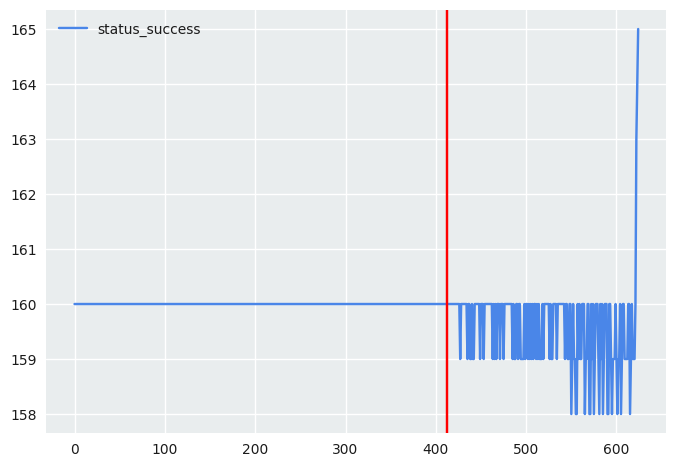

In [217]:
df.plot(y=['status_success'], use_index=True).axvline(selected, color='red')

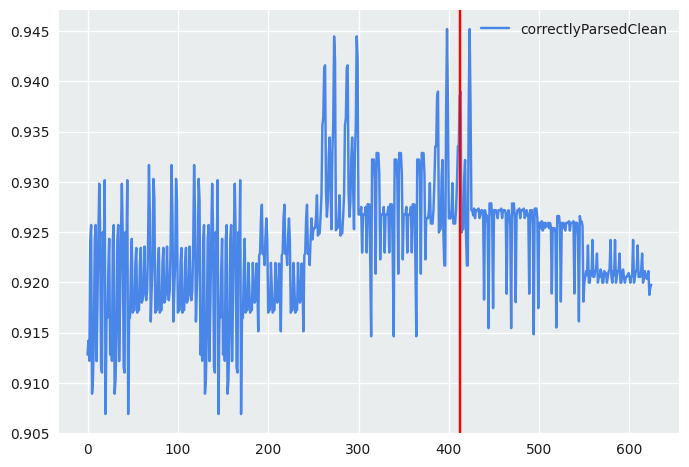

In [218]:
df.plot(y=['correctlyParsedClean'], use_index=True).axvline(selected, color='red')

In [219]:
def table_selection_acc(row):
    return (row['confusion_(True, True)'] + row['confusion_(False, False)']) / (row['confusion_(True, True)'] + row['confusion_(False, False)'] + row['confusion_(True, False)'] + row['confusion_(False, True)'])
df['table_selection_acc'] = df.apply(func=table_selection_acc, axis='columns')

In [220]:
def table_selection_prec(row):
    return row['confusion_(True, True)'] / (row['confusion_(True, True)'] + row['confusion_(True, False)'])
df['table_selection_prec'] = df.apply(func=table_selection_prec, axis='columns')

In [221]:
def table_selection_recall(row):
    return row['confusion_(True, True)'] / (row['confusion_(True, True)'] + row['confusion_(False, True)'])
df['table_selection_recall'] = df.apply(func=table_selection_recall, axis='columns')

In [222]:
def table_selection_f1(row):
    return (2 * row['table_selection_prec'] * row['table_selection_recall']) / (row['table_selection_prec'] + row['table_selection_recall'])
df['table_selection_f1'] = df.apply(func=table_selection_f1, axis='columns')

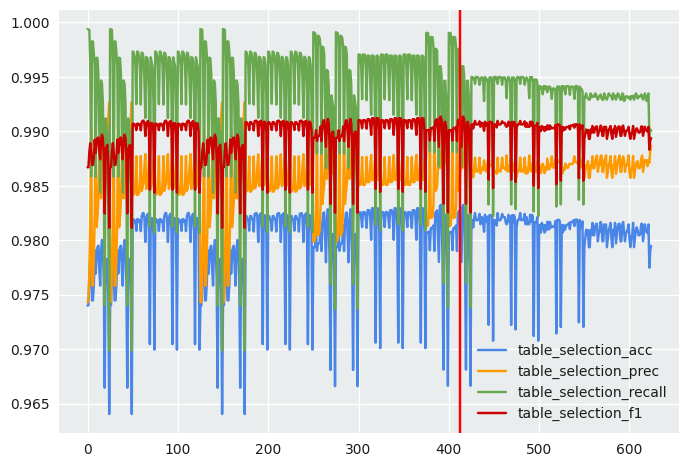

In [223]:
df.plot(y=['table_selection_acc', 'table_selection_prec', 'table_selection_recall', 'table_selection_f1'], use_index=True).axvline(selected, color='red')
# df[df['configuration_min_block_compatibility'] > 0.51].plot(y=['table_selection_acc', 'table_selection_prec', 'table_selection_recall'], use_index=True)

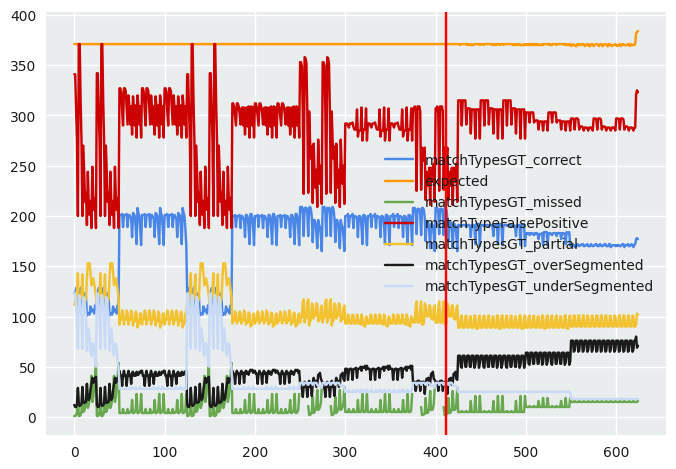

In [224]:
df.plot(y=['matchTypesGT_correct', 'expected', 'matchTypesGT_missed', 'matchTypeFalsePositive', 'matchTypesGT_partial', 'matchTypesGT_overSegmented', 'matchTypesGT_underSegmented'], use_index=True).axvline(selected, color='red')

In [225]:
df[
    (df['matchTypesGT_correct'] >= 200) & 
#     (df['matchTypesGT_missed'].isnull()) &
    (df['table_selection_f1'] >= 0.99) &
    (df['jaccardAvg'] >= 0.85) &
    (df['jaccardStdDev'] <= 0.3) & 
    (df['correctlyParsedClean'] >= 0.95) &
    (df['matchTypeFalsePositive'] <= 300)
].sort_values(
    by=['matchTypesGT_underSegmented', 'matchTypesGT_correct'], 
    ascending=[True, False]
)[
    ['matchTypesGT_correct', 'jaccardAvg', 'table_selection_f1', 'correctlyParsedClean', 'jaccardStdDev', 'matchTypesGT_underSegmented']
]

,matchTypesGT_correct,jaccardAvg,table_selection_f1,correctlyParsedClean,jaccardStdDev,matchTypesGT_underSegmented


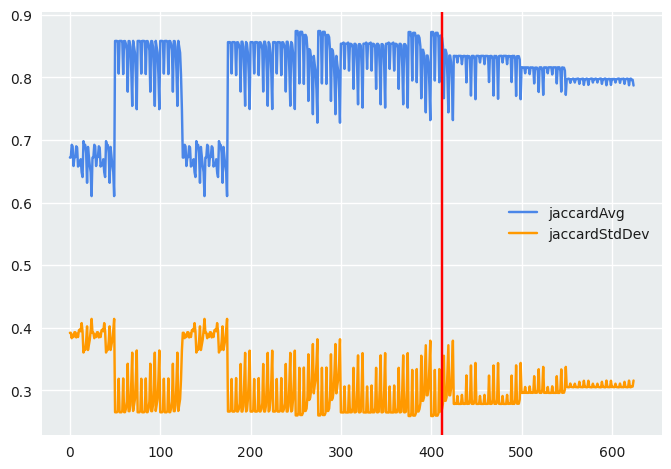

In [226]:
df.plot(y=['jaccardAvg', 'jaccardStdDev'], use_index=True).axvline(selected, color='red')

In [227]:
df['selectionScore'] = df.apply(func=lambda row: prod([
    row['matchTypesGT_correct'] / row['expected'],
#     row['table_selection_f1'],
    row['jaccardAvg'],
    row['correctlyParsedClean'],
    (row['expected'] - row['matchTypesGT_missed']) / row['expected'],
    (row['got'] - row['matchTypeFalsePositive']) / row['got']
]) , axis='columns')
df.sort_values(by=['selectionScore'], ascending=[False])[['selectionScore', 'min_block_compatibility', 'block_min_column_consistency', 'final_min_column_consistency', 'min_table_consistency']][:10]

,selectionScore,min_block_compatibility,block_min_column_consistency,final_min_column_consistency,min_table_consistency
387,0.302072,0.71,0.11,0.51,0.51
412,0.302072,0.71,0.31,0.51,0.51
411,0.302059,0.71,0.31,0.51,0.31
386,0.302059,0.71,0.11,0.51,0.31
410,0.300554,0.71,0.31,0.51,0.11
385,0.300554,0.71,0.11,0.51,0.11
287,0.300101,0.51,0.31,0.51,0.51
262,0.300101,0.51,0.11,0.51,0.51
261,0.299329,0.51,0.11,0.51,0.31
286,0.299329,0.51,0.31,0.51,0.31


In [228]:
df.loc[selected]

min_block_compatibility              0.710000
block_min_column_consistency         0.310000
final_min_column_consistency         0.510000
min_table_consistency                0.510000
status_success                     160.000000
confusion_(True, False)           1755.000000
confusion_(True, True)          114548.000000
confusion_(False, False)          2478.000000
confusion_(False, True)            299.000000
lineCount                       119080.000000
correctlyParsedClean                 0.938506
jaccardAvg                           0.862939
jaccardStdDev                        0.270000
expected                           371.000000
got                                790.000000
expectedGotRatio                     2.959375
eager                              255.000000
matchTypesGT_partial                93.000000
matchTypesGT_underSegmented         34.000000
matchTypesGT_correct               206.000000
matchTypesGT_overSegmented          35.000000
matchTypesGT_missed               

In [229]:
(
    df.sort_values(by=['status_success'], ascending=[True])['status_success'].values[:1],
    df.sort_values(by=['status_success'], ascending=[False])['status_success'].values[:1]
)

(array([158]), array([165]))

In [230]:
(
    df.sort_values(by=['matchTypesGT_correct'], ascending=[True])['matchTypesGT_correct'].values[:1],
    df.sort_values(by=['matchTypesGT_correct'], ascending=[False])['matchTypesGT_correct'].values[:1]
)

(array([101]), array([209]))

In [231]:
(
    df.sort_values(by=['matchTypeFalsePositive'], ascending=[True])['matchTypeFalsePositive'].values[:1],
    df.sort_values(by=['matchTypeFalsePositive'], ascending=[False])['matchTypeFalsePositive'].values[:1]
)

(array([188]), array([371]))

In [232]:
(
    df.sort_values(by=['matchTypesGT_missed'], ascending=[True])['matchTypesGT_missed'].values[:1],
    df.sort_values(by=['matchTypesGT_missed'], ascending=[False])['matchTypesGT_missed'].values[:1]
)

(array([1.]), array([54.]))

In [233]:
(
    df.sort_values(by=['jaccardAvg'], ascending=[True])['jaccardAvg'].values[:1],
    df.sort_values(by=['jaccardAvg'], ascending=[False])['jaccardAvg'].values[:1]
)

(array([0.61023242]), array([0.87390474]))

In [234]:
(
    df.sort_values(by=['correctlyParsedClean'], ascending=[True])['correctlyParsedClean'].values[:1],
    df.sort_values(by=['correctlyParsedClean'], ascending=[False])['correctlyParsedClean'].values[:1]
)

(array([0.90690139]), array([0.94520475]))

In [235]:
(
    df.sort_values(by=['table_selection_f1'], ascending=[True])['table_selection_f1'].values[:1],
    df.sort_values(by=['table_selection_f1'], ascending=[False])['table_selection_f1'].values[:1]
)

(array([0.98114554]), array([0.99135484]))